In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from keras import backend as k
from keras.callbacks import EarlyStopping

In [40]:
# Split Data to Train and Test Sets
(trainx,trainy),(testx,testy)=mnist.load_data();

In [ ]:
for i in range(10):
  plt.imshow(trainx[i+1,:,:],cmap='gray',vmin=0,vmax=255)
  plt.show()

In [42]:
# Train and Test Data Normalization
trainx=(trainx-trainx.min())/(trainx.max()-trainx.min())
testx=(testx-testx.min())/(testx.max()-testx.min())

In [43]:
# Trian and Test Data To Categrical
trainy=to_categorical(trainy)
testy=to_categorical(testy)

In [44]:
# Identify the first or last channel of the Images
if k.image_data_format=='channel first':
  trainx=trainx.reshape(trainx.shape[0],1,trainx.shape[1],trainx.shape[2])
  testx=testx.reshape(testx.shape[0],1,testx.shape[1],testx.shape[2])
  input_shape=(1,trainx.shape[1],trainx.shape[2])
else:
  trainx=trainx.reshape(trainx.shape[0],trainx.shape[1],trainx.shape[2],1)
  testx=testx.reshape(testx.shape[0],testx.shape[1],testx.shape[2],1)
  input_shape=(trainx.shape[1],trainx.shape[2],1)


In [45]:
# Create a Model
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [46]:
# Apply EarlyStopping To Prevent Overfitting
es=EarlyStopping(monitor='val_loss',verbose=1,mode='auto',patience=5)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [47]:
# Train The Model
h=model.fit(trainx,trainy,epochs=10,batch_size=64,validation_split=0.1,callbacks=[es])

Epoch 1/10
844/844 [==============================] - 7s 8ms/step - loss: 0.2838 - accuracy: 0.9145 - val_loss: 0.0666 - val_accuracy: 0.9813
Epoch 2/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0956 - accuracy: 0.9708 - val_loss: 0.0495 - val_accuracy: 0.9855
Epoch 3/10
844/844 [==============================] - 6s 8ms/step - loss: 0.0698 - accuracy: 0.9780 - val_loss: 0.0420 - val_accuracy: 0.9882
Epoch 4/10
844/844 [==============================] - 6s 8ms/step - loss: 0.0610 - accuracy: 0.9814 - val_loss: 0.0361 - val_accuracy: 0.9893
Epoch 5/10
844/844 [==============================] - 6s 8ms/step - loss: 0.0542 - accuracy: 0.9830 - val_loss: 0.0344 - val_accuracy: 0.9907
Epoch 6/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0485 - accuracy: 0.9849 - val_loss: 0.0360 - val_accuracy: 0.9887
Epoch 7/10
844/844 [==============================] - 6s 8ms/step - loss: 0.0435 - accuracy: 0.9865 - val_loss: 0.0318 - val_accuracy: 0.9915
Epoch 

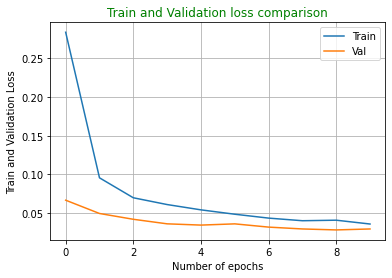

In [48]:
# Plots
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Train and Validation loss comparison',color='green')
plt.xlabel('Number of epochs')
plt.ylabel('Train and Validation Loss')
plt.legend(['Train','Val'])
plt.grid()
plt.show()


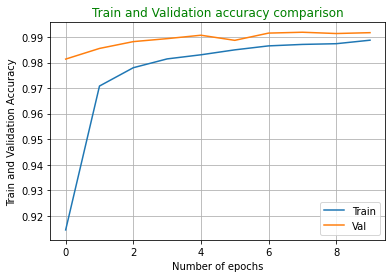

In [49]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Train and Validation accuracy comparison',color='green')
plt.xlabel('Number of epochs')
plt.ylabel('Train and Validation Accuracy')
plt.legend(['Train','Val'])
plt.grid()
plt.show()


In [50]:
# Model Accuracy
score=model.evaluate(testx,testy,batch_size=64)*100
print(f"score : {score[1]} , loss : {score[0]}")

157/157 [==============================] - 1s 4ms/step - loss: 0.0236 - accuracy: 0.9915
score : 0.9915000200271606 , loss : 0.0235909316688776


In [ ]:
model.predict(testx,batch_size=64)

In [22]:
Pred_classes=(model.predict(testx>0.5)).astype('int32')